In [1]:
import numpy as np
import random
import copy

In [ ]:
"""
import pandas as pd

indextitle = pd.Series(np.array(["Apples", "Oranges", "Puppies", "Ducks"]), name="merge") 
column = [1., 2., 3., 4.]
df = pd.DataFrame(index=indextitle)
df["column"] = column

In [ ]:
"""
df.index.rename("merge", inplace=True)
df

In [ ]:
random.randint??

In [2]:

class Node(object):
    def __init__(self, lefttree, righttree, splitattr, splitvalue, path, size=-1):
        self.left = lefttree
        self.right = righttree
        self.splitattr = splitattr
        self.splitvalue = splitvalue
        self.size = size
        self.path = path


def itree(X, path=[], e=0, limit=10):
    '''
    X: data set to construct the tree
    e: current tree height
    l: limit of the height of the tree
    '''
    m, n = X.shape
    print(path)
    
    if e > limit or m <= 1:
        # let size = m, the number of samples in the matrix
        # if the node is the leaf or vide,  0<= m <= 1
        return Node([], [], None, None, path, m)
    
    rnd_attr = random.randint(0, n-1)  # choose one attribute by idx
    maxvalue = np.max(X[:, rnd_attr])
    minvalue = np.min(X[:, rnd_attr])
    rnd_split = random.random()*(maxvalue - minvalue + 1e-10) + minvalue  # get a value [minvalue, maxvalue)
    
    X_left = X[X[:, rnd_attr] < rnd_split]
    X_right = X[X[:, rnd_attr] >= rnd_split]
    e = e+1
    path_left = path.copy() + [0]
    path_right = path.copy() + [1]
    
    print("at height", e, "X --> Xleft.length =", X_left.shape[0], "Xright.length =", X_right.shape[0])
    
    return Node(itree(X_left, path_left, e, limit), itree(X_right, path_right, e, limit), rnd_attr, rnd_split, path)
    
        

In [3]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))


In [4]:
X_train

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [5]:
root = itree(X_train)

[]
at height 1 X --> Xleft.length = 32 Xright.length = 168
[0]
at height 2 X --> Xleft.length = 1 Xright.length = 31
[0, 0]
[0, 1]
at height 3 X --> Xleft.length = 11 Xright.length = 20
[0, 1, 0]
at height 4 X --> Xleft.length = 10 Xright.length = 1
[0, 1, 0, 0]
at height 5 X --> Xleft.length = 2 Xright.length = 8
[0, 1, 0, 0, 0]
at height 6 X --> Xleft.length = 1 Xright.length = 1
[0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 1]
at height 6 X --> Xleft.length = 1 Xright.length = 7
[0, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 1]
at height 7 X --> Xleft.length = 6 Xright.length = 1
[0, 1, 0, 0, 1, 1, 0]
at height 8 X --> Xleft.length = 5 Xright.length = 1
[0, 1, 0, 0, 1, 1, 0, 0]
at height 9 X --> Xleft.length = 3 Xright.length = 2
[0, 1, 0, 0, 1, 1, 0, 0, 0]
at height 10 X --> Xleft.length = 1 Xright.length = 2
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
at height 11 X --> Xleft.length = 1 Xright.length = 1
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1

In [6]:
# a path length
def get_path(x, T, path=[], e=0):
    if T.size >= 0:
        return e
    else:
        e += 1
        return get_path(x, T.left, path+[0], e) if x[T.splitattr] < T.splitvalue else get_path(x, T.right, path+[1], e)
    
x_evaluate = np.array([ 2.5,  1.68268672])

get_path(x_evaluate, root)

9

In [7]:
np.random.randint(0, 10, 3)

array([5, 6, 1])

In [8]:



def subsampling(X_train, sample_size=256):
    m, n = X_train.shape
    samples_no_replacement = np.random.randint(0, m-1, 256)
    return X_train[samples_no_replacement]

# create a forest
def iforest(X_train, num_trees, subsample_size):
    forest = []
    height_limit = np.ceil(np.log2(subsample_size))
    
    for i in range(num_trees):
        X_sub = subsampling(X_train, subsample_size)
        forest.append(itree(X_sub, path=[], e=0, limit=height_limit))
        
    return forest
    
forest = iforest(X_train, 20, 256)

流式输出内容被截断，只能显示最后 5000 行内容。
[1, 0, 1]
at height 4 X --> Xleft.length = 16 Xright.length = 26
[1, 0, 1, 0]
at height 5 X --> Xleft.length = 1 Xright.length = 15
[1, 0, 1, 0, 0]
[1, 0, 1, 0, 1]
at height 6 X --> Xleft.length = 9 Xright.length = 6
[1, 0, 1, 0, 1, 0]
at height 7 X --> Xleft.length = 1 Xright.length = 8
[1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1]
at height 8 X --> Xleft.length = 7 Xright.length = 1
[1, 0, 1, 0, 1, 0, 1, 0]
at height 9 X --> Xleft.length = 2 Xright.length = 5
[1, 0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 1, 0, 1, 1]
at height 7 X --> Xleft.length = 5 Xright.length = 1
[1, 0, 1, 0, 1, 1, 0]
at height 8 X --> Xleft.length = 4 Xright.length = 1
[1, 0, 1, 0, 1, 1, 0, 0]
at height 9 X --> Xleft.length = 4 Xright.length = 0
[1, 0, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 1]
[1, 0, 1, 1]
at height 5 X --> Xleft.length = 4 Xright.length = 22
[1, 0, 1, 1, 0]
at height 6 X -->

In [9]:
forest

In [10]:
for idx, x in enumerate(X_test):
    heights = []
    for tree in forest:
        #print(x)
        heights.append(get_path(x, tree))
    print("average height for point idx =", idx, "is", np.mean(heights))

average height for point idx = 0 is 8.95
average height for point idx = 1 is 7.8
average height for point idx = 2 is 8.3
average height for point idx = 3 is 8.95
average height for point idx = 4 is 6.45
average height for point idx = 5 is 8.6
average height for point idx = 6 is 8.55
average height for point idx = 7 is 8.75
average height for point idx = 8 is 8.85
average height for point idx = 9 is 8.9
average height for point idx = 10 is 5.7
average height for point idx = 11 is 7.85
average height for point idx = 12 is 8.6
average height for point idx = 13 is 8.6
average height for point idx = 14 is 8.9
average height for point idx = 15 is 9.0
average height for point idx = 16 is 8.8
average height for point idx = 17 is 5.95
average height for point idx = 18 is 8.3
average height for point idx = 19 is 8.85
average height for point idx = 20 is 8.9
average height for point idx = 21 is 7.9
average height for point idx = 22 is 7.75
average height for point idx = 23 is 8.7
average height f

## version spark

In [11]:
import numpy as np
import pandas as pd

In [ ]:

%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [12]:
sc

''

In [ ]:
filename = './demo_fraud/Fraud-detection-using-deep-learning/data/creditcard.csv'

In [ ]:
dist_data = sc.textFile(filename, use_unicode="utf-8")

In [ ]:
dist_data.take(2)

[u'"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"',
 u'0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"']

In [ ]:
header = dist_data.first().split(",")
header

[u'"Time"',
 u'"V1"',
 u'"V2"',
 u'"V3"',
 u'"V4"',
 u'"V5"',
 u'"V6"',
 u'"V7"',
 u'"V8"',
 u'"V9"',
 u'"V10"',
 u'"V11"',
 u'"V12"',
 u'"V13"',
 u'"V14"',
 u'"V15"',
 u'"V16"',
 u'"V17"',
 u'"V18"',
 u'"V19"',
 u'"V20"',
 u'"V21"',
 u'"V22"',
 u'"V23"',
 u'"V24"',
 u'"V25"',
 u'"V26"',
 u'"V27"',
 u'"V28"',
 u'"Amount"',
 u'"Class"']

In [ ]:
# cleaning the data

In [ ]:
data = dist_data.filter(lambda line:line[1:5] != "Time").map(lambda line:line.split(","))

In [ ]:
data.count()

284807

In [ ]:
data.take(1)

[[u'0',
  u'-1.3598071336738',
  u'-0.0727811733098497',
  u'2.53634673796914',
  u'1.37815522427443',
  u'-0.338320769942518',
  u'0.462387777762292',
  u'0.239598554061257',
  u'0.0986979012610507',
  u'0.363786969611213',
  u'0.0907941719789316',
  u'-0.551599533260813',
  u'-0.617800855762348',
  u'-0.991389847235408',
  u'-0.311169353699879',
  u'1.46817697209427',
  u'-0.470400525259478',
  u'0.207971241929242',
  u'0.0257905801985591',
  u'0.403992960255733',
  u'0.251412098239705',
  u'-0.018306777944153',
  u'0.277837575558899',
  u'-0.110473910188767',
  u'0.0669280749146731',
  u'0.128539358273528',
  u'-0.189114843888824',
  u'0.133558376740387',
  u'-0.0210530534538215',
  u'149.62',
  u'"0"']]

In [ ]:
u'"0"'.replace('"', '')

u'0'

In [ ]:
data = data.map(lambda line:np.array(list(map(lambda x:float(x.replace('"', '')), line))))

In [ ]:
data.take(1)[0].size

31

In [ ]:
data.map(lambda x:x[2]).min()

-72.7157275629303

In [ ]:
limit = 10
m = 256
limit = max(limit, int(np.log2(m)))
np.log2(m)

8.0

In [ ]:
# write a sample function for rdd data, refer to 
# https://spark.apache.org/docs/1.1.1/api/python/pyspark.rdd.RDD-class.html

In [ ]:
def subsamplingRDD(X_train, sample_ratio):
    return X_train.sample(withReplacement=False,fraction=sample_ratio, seed=None)

In [ ]:
sampledData = subsamplingRDD(data, 0.003)
sampledData.count()

874

In [ ]:
# now write the function for create itree

class Node(object):
    def __init__(self, lefttree, righttree, splitattr, splitvalue, size=-1):
        self.left = lefttree
        self.right = righttree
        self.splitattr = splitattr
        self.splitvalue = splitvalue
        self.size = size

        
def itreeRDD(X, e=0, limit=10):
    '''
    X: RDD sampled data set to construct the tree, header not included
    e: current tree height
    l: limit of the height of the tree
    '''
    # m : the number of samples in X, n: number of columns
    m = X.count()
    n = X.take(1)[0].size
    
    if e > limit or m <= 1:    
        return Node([], [], None, None, m)
    
    rnd_attr = random.randint(0, n-1)  # choose one attribute by idx
    column = X.map(lambda line:line[rnd_attr])
    maxvalue = column.max()
    minvalue = column.min()
    rnd_split = random.random()*(maxvalue - minvalue + 1e-10) + minvalue  # get a value [minvalue, maxvalue)
    
    X_left = X.filter(lambda line:line[rnd_attr]<rnd_split).cache()
    X_right = X.filter(lambda line:line[rnd_attr]>=rnd_split).cache()

    #path_left = path.copy() + [0]
    #path_right = path.copy() + [1]
    
    #print("at height", e, "X --> Xleft.length =", X_left.shape[0], "Xright.length =", X_right.shape[0])
    
    return Node(itreeRDD(X_left, e+1, limit), itreeRDD(X_right, e+1, limit), rnd_attr, rnd_split, -1)
    

In [ ]:
"""
#test itreeRDD
m = data.count()
subsample_size=256
tree = itreeRDD(subsamplingRDD(data, float(subsample_size)/m), e=0, limit=8)

t1 = tree
l = 0
while t1.size < 0:
    print(t1.splitattr, t1.splitvalue)
    t1 = t1.right
    l += 1

In [ ]:
# create a forest RDD: seems pyspark doesn't support nested function， whether use itree or replace by forest.join(X_train)
# https://stackoverflow.com/questions/42325496/how-to-use-spark-intersection-by-key-or-filter-with-two-rdd

def iforestRDD(X_train, num_trees=150, subsample_size=265):
    """
    X_train: RDD data set to construct the forest
    """
    m = X_train.count()
    n = X_train.take(1)[0].size
    
    lis = [None]*num_trees
    forest = np.array(lis)
    
    # we can also allow the limit to be greater when the sample size is larger
    height_limit = np.ceil(np.log2(subsample_size))
    trainforest = list(map(lambda s:itreeRDD(subsamplingRDD(X_train, float(subsample_size)/m), 
                                                e=0, limit=height_limit), forest))

    return trainforest
    


In [ ]:
"""
# test iforestRDD
X_train = data
m = X_train.count()
n = X_train.take(1)[0].size

lis = [None]*4
forest = np.array(lis)

# we can also allow the limit to be greater when the sample size is larger
height_limit = np.ceil(np.log2(256))

trainforest = np.array(map(lambda s:itreeRDD(subsamplingRDD(X_train, float(subsample_size)/m), 
                                    subsample_size, n, e=0, limit=height_limit), forest))
trainforest

In [ ]:
forest = iforestRDD(data, 4, 256)

In [ ]:
forest

In [ ]:
t1, t2, t3, t4 = forest

T = t2
l = 0
while T.size < 0:
    #print(T.splitattr, T.splitvalue)
    T = T.right
    l += 1
print(l)

3


In [ ]:
# calculate the path length and add the cost indicated in the paper

In [ ]:
def cost(num_items):
    #二叉搜索树的平均路径长度。0.5772156649:欧拉常数
    return int(2*(np.log(num_items-1) + 0.5772156649)-(2*(num_items-1)/num_items))

In [ ]:
# test cost
cost(11000)

18

In [ ]:
def get_path_RDD(x, T, e=0): 
    """
    x : a list or np.array, the row of RDD
    T: a Node instance
    e: recursive variable to record the length of a path
    """
    if T.size == 1 or T.size == 0:  # if tree node is a leaf
        return e
    elif T.size > 1:
        return e + cost(T.size)
    else: # if tree has children
        e += 1
        return get_path_RDD(x, T.left, e) if x[T.splitattr] < T.splitvalue else get_path_RDD(x, T.right, e)

In [ ]:
# predict one line
def predict_path(x, forest):
    predictions = np.array(list(map(lambda T:get_path_RDD(x, T), forest)))
    return predictions

def predict_score(x, forest, num_samples):
    predictions = np.array(list(map(lambda T:get_path_RDD(x, T), forest)))
    return math.pow(2, -float(predictions.sum()/predictions.size)/cost(num_samples)) #Anomaly Score


In [ ]:
X_train

PythonRDD[28] at RDD at PythonRDD.scala:48

In [ ]:
path_mat = X_train.map(lambda line: predict_path(line, forest))

In [ ]:
predictions = path_mat.take(100)

In [ ]:
# test score

In [ ]:
num_samples = 256
scores_mat = X_train.map(lambda line: predict_score(line, forest, num_samples))

In [ ]:
xx = scores_mat.take(1000)

In [ ]:
min(xx), max(xx)

(0.34258774618003096, 0.7297400528407231)

In [ ]:
cost(256)

11

(array([246., 400., 129.,  79., 100.,  20.,  12.,   4.,   4.,   6.]),
 array([0.34258775, 0.38130298, 0.42001821, 0.45873344, 0.49744867,
        0.5361639 , 0.57487913, 0.61359436, 0.65230959, 0.69102482,
        0.72974005]),
 <a list of 10 Patch objects>)

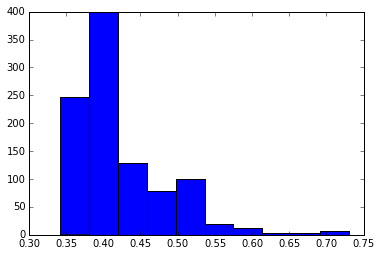

In [ ]:
plt.hist(xx)